# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import os
# import glob

from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression

from PIL import Image
from matplotlib import image

In [2]:
os.chdir("/Users/shivakmuddam")
os.getcwd()

'/Users/shivakmuddam'

In [3]:
%%time
# Extrating the files from the Zipper Folder
# ! wget os.getcwd() -O mnist.zip
# ! tar -xzvf mnist.zip
# ! del txt_reviews.zip

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.87 µs


# Extract the labels

In [77]:
path = os.path.join(os.getcwd(), "New folder")
# path = os.chdir(os.getcwd())
print(path)

dirs = os.listdir(path)
dirs.pop(0)
dirs
# dirs.sort()

# dirs.pop(0)
# dirs

/Users/shivakmuddam/New folder


['R',
 'U',
 'I',
 'N',
 'G',
 'Z',
 'T',
 'S',
 'A',
 'F',
 'O',
 'H',
 'M',
 'J',
 'C',
 'D',
 'V',
 'Q',
 'X',
 'E',
 'B',
 'K',
 'L',
 'Y',
 'P',
 'W']

## Image Loading and Preprocessing

In [10]:
from tqdm import tqdm
tqdm.pandas()

# Convert all images to the numpy array

In [28]:
%%time
dir_label = []
file_path = []
# X = pd.DataFrame()
X = []

counter = 0
for each_dir in (dirs):
    dir_path = str(os.path.join(path, each_dir))
#     print(dir_path)
    for pic in os.listdir(dir_path):
        pic_path = os.path.join(dir_path, pic)
#         print("Dir: ", each_dir,"     |    " "FilePath: ", pic_path)
        dir_label.append(each_dir)
        file_path.append(pic_path)
        img = Image.open(pic_path)
        img = img.resize((10, 10))
        img = img.convert("L")
        img_array = np.array(img)
        img_array  = img_array/255.0
        img_array.shape

        img_ravel = img_array.ravel()
        img_ravel
#         X = pd.concat([pd.Series(img_ravel)], axis=1)
#         X[counter] = img_ravel
        X.append(img_ravel)        
        # It captures white background with white image
        dir_label.append(each_dir)
        X.append(1-img_ravel)
#         counter += 1
        
y = pd.Series(dir_label)

CPU times: user 2min 24s, sys: 1min 14s, total: 3min 39s
Wall time: 5min 18s


In [37]:
print(len(y))

744902


In [ ]:
# Y=pd.DataFrame(y)
# Y.head()

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()
# Y=le.fit_transform(Y)

In [ ]:
# Y.shape

# Convert to DataFrame

In [43]:
X = pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744897,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
744898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
744899,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
744900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
X.shape

(744902, 100)

In [45]:
img = Image.open(file_path[0])
img.size

(28, 28)

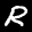

In [46]:
img = img.resize((32, 32))
img

In [47]:
(np.array(img)/255.0).ravel()

array([0., 0., 0., ..., 0., 0., 0.])

In [48]:
img_array = np.array(img)
# img_array  = img_array/255.0
img_array.shape

img_ravel = img_array.ravel()
img_ravel

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [49]:
len(img_ravel)

1024

# Split the data into train and test

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, 
                                                    shuffle=True, random_state=50)

In [52]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
695053,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
210499,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
521320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45959,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
257833,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321502,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
441633,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
677997,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
239499,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


# Implement Logistic Classifier

In [73]:
log_classifier = LogisticRegression()
log_classifier.fit(X_train, y_train)

y_pred = log_classifier.predict(X_test)
y_pred

accuracy_score_ = accuracy_score(y_test, y_pred)
accuracy_score_

/Users/shivakmuddam/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.15531252237416768

# Implement Ada Boost Classifier (Ensemble)

In [74]:
Adaboost_classifier = AdaBoostClassifier()
Adaboost_classifier.fit(X_train, y_train)

y_pred = Adaboost_classifier.predict(X_test)
y_pred

accuracy_score_ = accuracy_score(y_test, y_pred)
accuracy_score_

0.5203425932555309

In [ ]:
# Implement Random Forest Classifier

In [53]:
classifier_ = RandomForestClassifier()
classifier_.fit(X_train, y_train)

y_pred = classifier_.predict(X_test)
y_pred

accuracy_score_ = accuracy_score(y_test, y_pred)
accuracy_score_

0.9896720841984679

In [54]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
574685,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
244773,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
266676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
283387,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
529302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23999,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
270965,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
# classifier_ = GradientBoostingClassifier()
# classifier_.fit(X_train, y_train)

# y_pred = classifier_.predict(X_test)
# y_pred

# accuracy_score_ = accuracy_score(y_test, y_pred)
# accuracy_score_

# Serialize the model to test the query point

In [57]:
import pickle

In [58]:
# Convert the model to pickle and Save it
pickle.dump(classifier_, open("mnist_RF_pickle_.sav", "wb"))

In [59]:
loaded_rf_model = pickle.load(open("mnist_RF_pickle_.sav", "rb"))

In [60]:
X_test.shape

(111736, 100)

# Load the deserialized model and test the char image

In [68]:
# q_path = r"/Users/shivakmuddam/New folder/E/E-10.png"
q_path = r"/Users/shivakmuddam/New folder/D/D-1.png"
q_img = Image.open(q_path)
q_img = q_img.convert("L")
q_img = q_img.resize((10, 10))
q_img = np.array(q_img)/255
q_img = q_img.ravel()
# q_img = 1-q_img
q_img

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00784314, 0.32941176,
       0.50980392, 0.25882353, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.08627451, 0.59607843,
       0.16470588, 0.43921569, 0.48235294, 0.00392157, 0.        ,
       0.        , 0.        , 0.        , 0.01960784, 0.29019608,
       0.29803922, 0.00392157, 0.51764706, 0.16862745, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.18039216,
       0.54901961, 0.        , 0.28235294, 0.40784314, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.4745098 ,
       0.29019608, 0.        , 0.16470588, 0.45882353, 0.        ,
       0.        , 0.        , 0.        , 0.1254902 , 0.6       ,
       0.01568627, 0.05098039, 0.4745098 , 0.34117647, 0.        ,
       0.        , 0.22745098, 0.53333333, 0.61568627, 0.70980

# Predict the class

In [70]:
y_pred = loaded_rf_model.predict(q_img.reshape(1, -1))
y_pred[0]

'D'

# Predict the Accuracy of the class predicted

In [75]:
y_pred_proba = loaded_rf_model.predict_proba(q_img.reshape(1, -1))
np.max(y_pred_proba)*100

93.0